# machine-learning-technique-programming-assessment-book

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet
!pip install keras
!pip install tensorflow


     |████████████████████████████████| 1.7 MB 6.3 MB/s eta 0:00:01
     |█████████████████████████▊      | 464.0 MB 137.6 MB/s eta 0:00:017 MB 5.7 MB/s eta 0:01:33

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |█████████████████████████████▉  | 538.2 MB 100.9 MB/s eta 0:00:01

     |██████████████████████████████  | 542.9 MB 100.9 MB/s eta 0:00:01

     |██████████████████████████████▎ | 547.7 MB 100.9 MB/s eta 0:00:01

     |██████████████████████████████▋ | 552.1 MB 100.9 MB/s eta 0:00:01

     |██████████████████████████████▉ | 556.8 MB 100.9 MB/s eta 0:00:01

     |███████████████████████████████ | 561.4 MB 100.9 MB/s eta 0:00:01

     |███████████████████████████████▎| 566.0 MB 100.9 MB/s eta 0:00:01

     |███████████████████████████████▋| 570.7 MB 100.9 MB/s eta 0:00:01

     |███████████████████████████████▉| 574.9 MB 100.9 MB/s eta 0:00:01

     |████████████████████████████████| 578.1 MB 49.5 MB/s eta 0:00:01

In [5]:
!pip install requests

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="machine-learning-technique-programming-assessment-book")

## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [12]:
from urllib.request import urlretrieve

In [13]:
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

In [14]:
urlretrieve(url, 'mnist.npz')

('mnist.npz', <http.client.HTTPMessage at 0x7facaaf289d0>)

In [10]:
##### DATASET GENERATION #####
import numpy as np
(X_train, y_train), (X_test, y_test) = response
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)

ValueError: too many values to unpack (expected 2)

In [4]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

NameError: name 'tf' is not defined

# Week 3

## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))

In [4]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

## Problem 1
How many samples are there in the dataset?



In [9]:
data3.shape

(666, 2)

In [6]:
X.shape

(1998, 2)

## Problem 2

How many features are there in the dataset?

In [10]:
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.



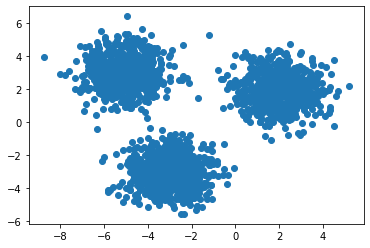

In [12]:
plt.scatter(X[:,0],X[:,1])

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


## Problem 4 

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



In [28]:
k=3
cluster_centers=X[[200,800,1200]]
cluster_centers

array([[ 1.40134606,  0.88410301],
       [-2.56922887, -3.14989159],
       [-2.84782302, -3.37412632]])

In [32]:
def assign_clusters(X, k, cluster_centers):
    z=np.array([])

    for each in X :
        dists_from_each_center=[np.linalg.norm(cluster_centers[i]- each) for i in range (k) ]
        chosen_cluster = np.argmin(dists_from_each_center)
        z=np.append(z,chosen_cluster)
    return z    
    

## Problem 5

Plot the data points, with different color for different clusters.


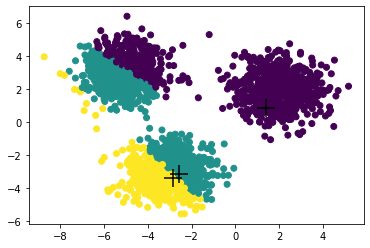

In [37]:
plt.scatter(X[:,0],X[:,1],c=z)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='k',marker="+",s=300)

In [40]:
X[[False if i%2 == 0 else True for i in range(X.shape[0])]]

array([[ 2.97873798,  4.2408932 ],
       [ 2.95008842,  1.84864279],
       [ 2.14404357,  3.45427351],
       ...,
       [-4.82284166,  1.97682687],
       [-6.46836696,  3.5764787 ],
       [-4.60505181,  2.49611011]])

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



In [44]:
[X[z==i] for i in range(k)]

[array([[ 3.76405235,  2.40015721],
        [ 2.97873798,  4.2408932 ],
        [ 3.86755799,  1.02272212],
        ...,
        [-4.00609776,  3.65627066],
        [-4.11048645,  4.54093298],
        [-3.0539505 ,  3.97638174]]),
 array([[-2.89509283, -2.86608708],
        [-3.97240289, -1.65377893],
        [-2.37748086, -3.63119194],
        ...,
        [-6.46836696,  3.5764787 ],
        [-4.93469439,  2.2264872 ],
        [-4.60505181,  2.49611011]]),
 array([[-3.61262574, -3.82282832],
        [-4.49026539, -1.50386036],
        [-3.46749317, -3.8624933 ],
        [-2.5195755 , -3.96818606],
        [-3.41227175, -3.40345918],
        [-4.83002855, -3.69583512],
        [-3.77277188, -2.1179434 ],
        [-4.25259334, -3.58632003],
        [-3.45764059, -2.62818892],
        [-4.80814393, -2.58866576],
        [-3.48324954, -2.99742882],
        [-3.32656098, -3.00820988],
        [-2.58590865, -3.50723446],
        [-3.03926799, -3.94893281],
        [-2.86808824, -4.98056559]

In [49]:
[np.mean(X[z==i] ,axis=0) for i in range(k)]

[array([0.15243752, 2.47002787]),
 array([-4.09339723,  0.26891354]),
 array([-3.71658966, -3.31569723])]

In [51]:
def compute_cluster_centers(X, z, k):
    cluster_centers = np.array([np.mean(X[z==i] ,axis=0) for i in range(k)])
    return cluster_centers

In [52]:
cluster_centers=compute_cluster_centers(X, z, k)

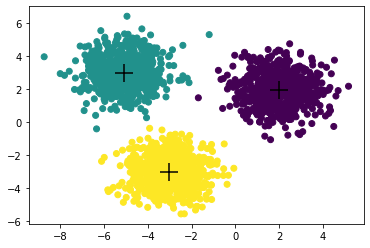

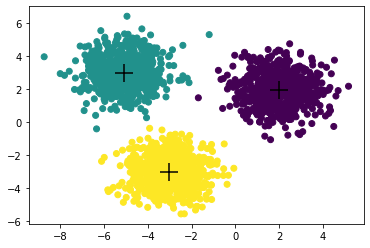

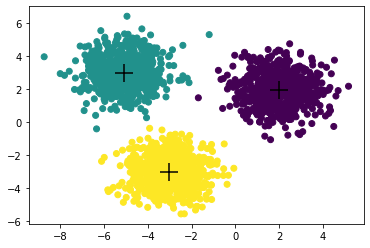

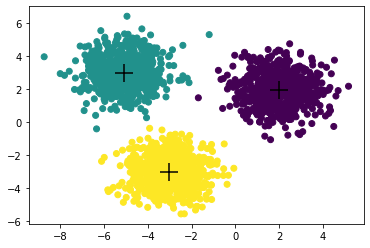

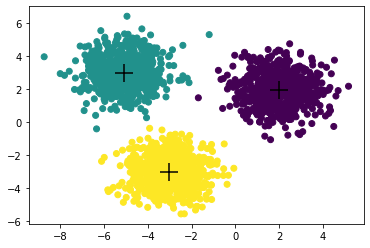

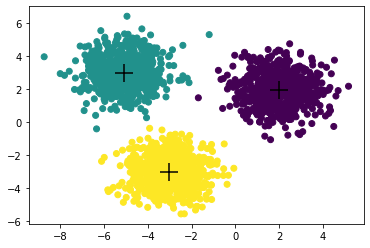

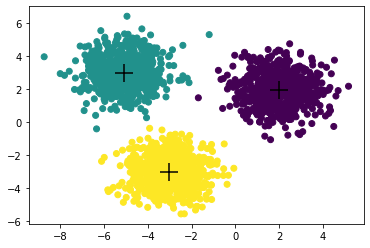

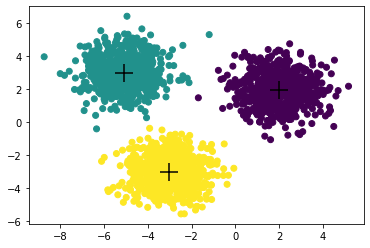

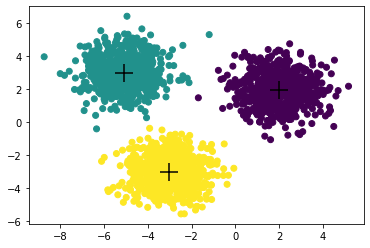

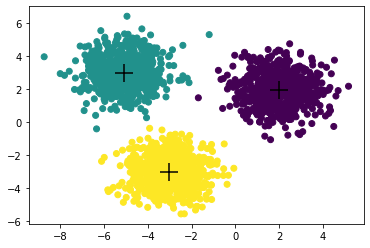

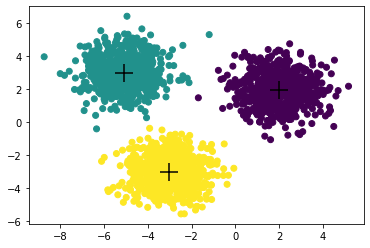

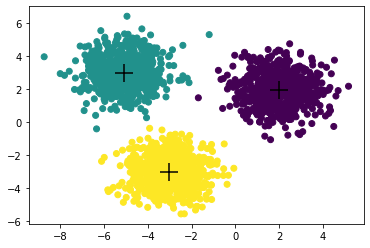

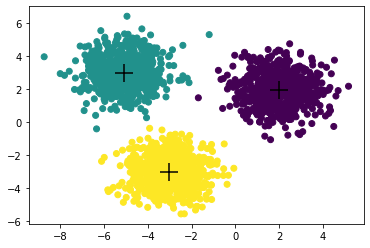

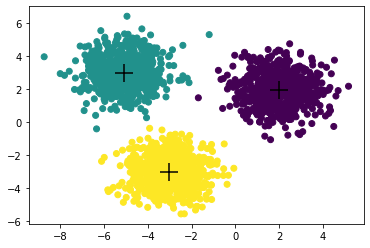

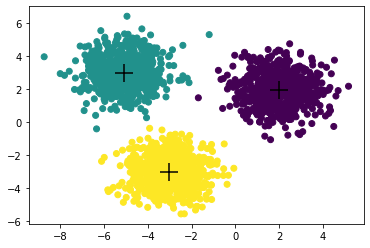

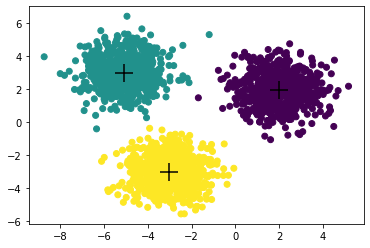

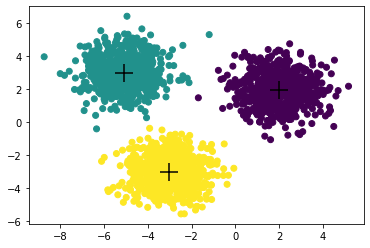

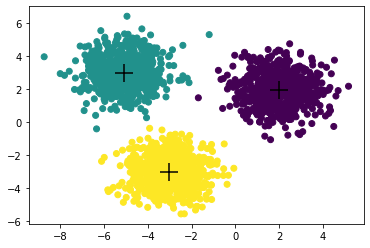

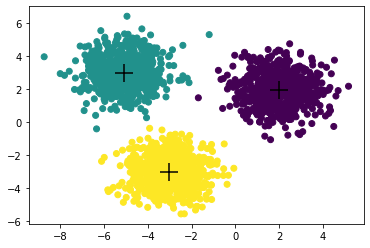

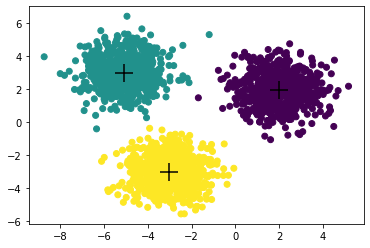

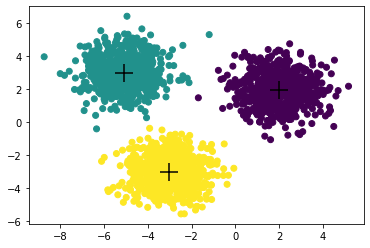

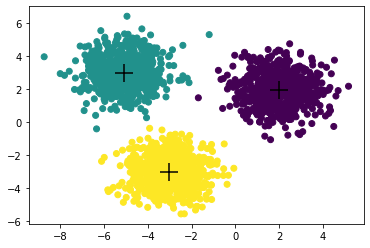

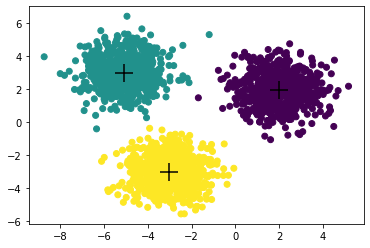

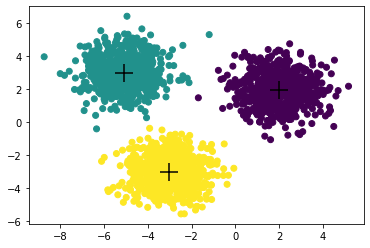

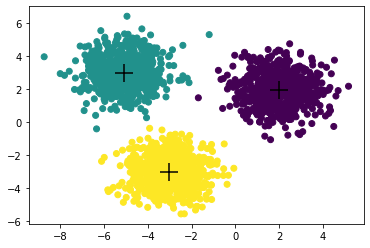

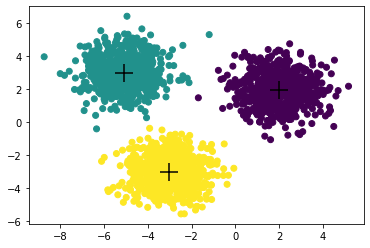

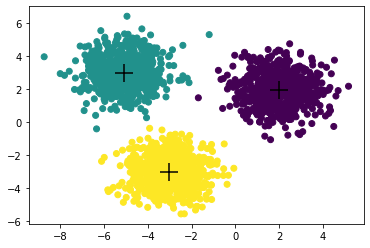

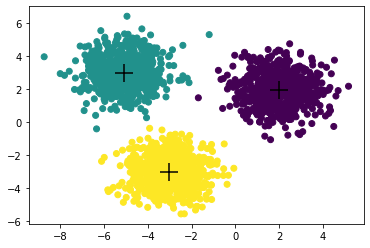

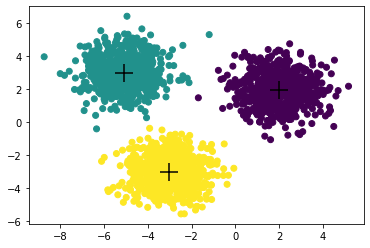

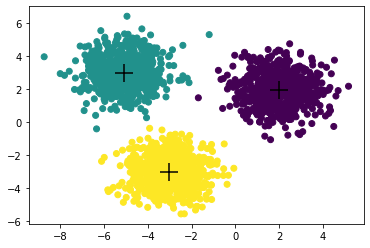

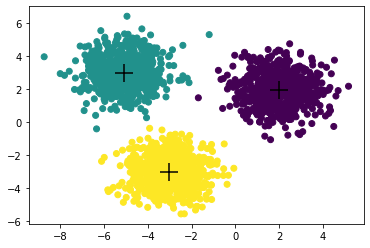

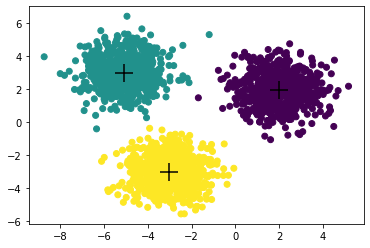

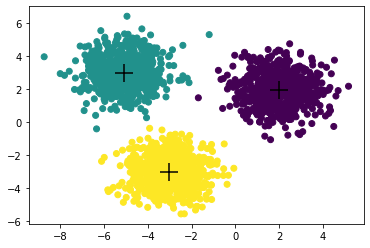

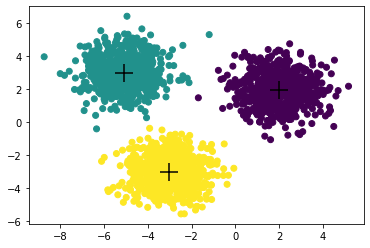

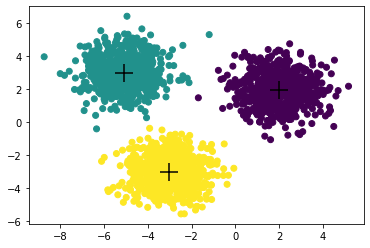

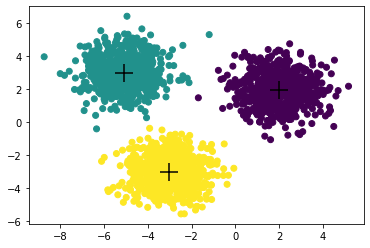

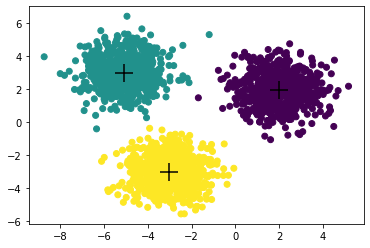

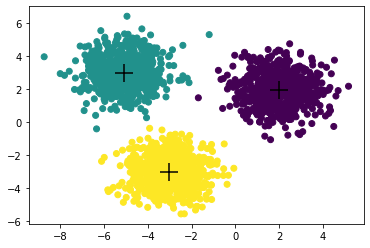

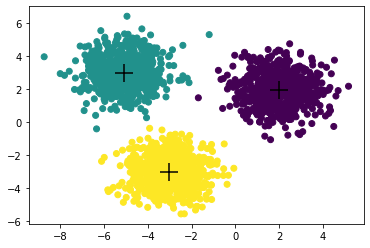

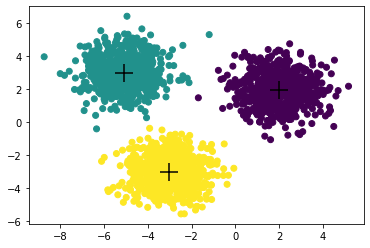

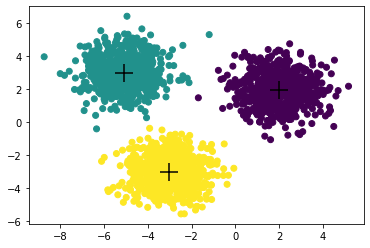

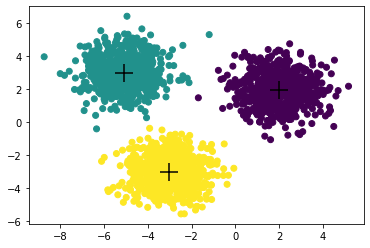

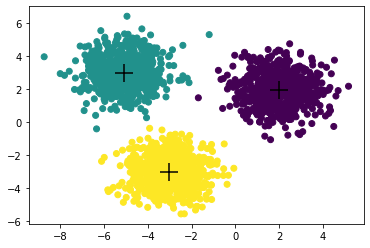

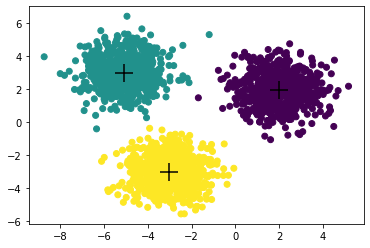

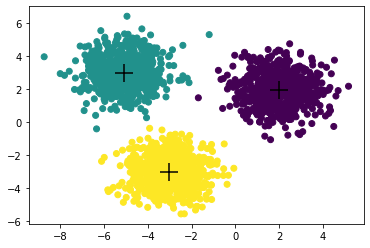

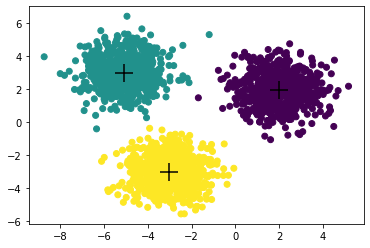

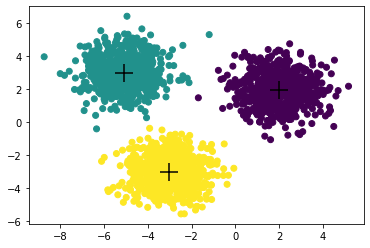

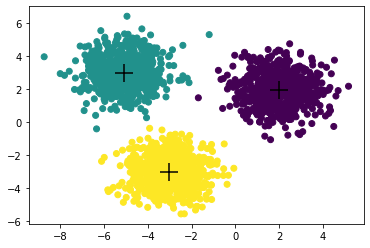

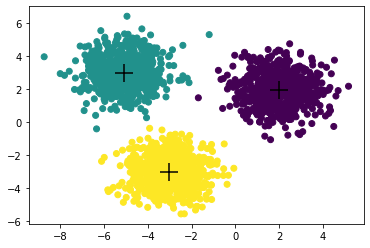

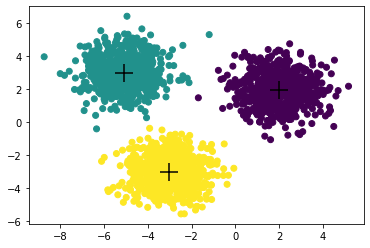

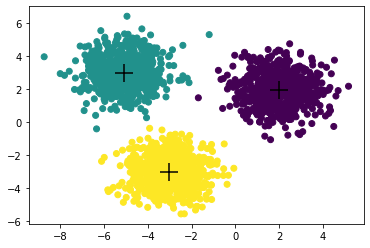

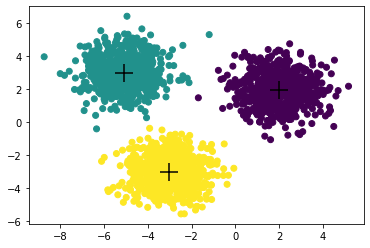

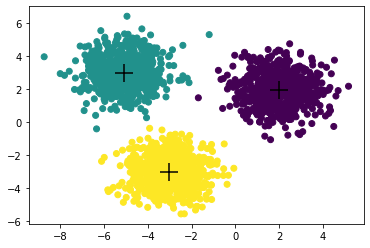

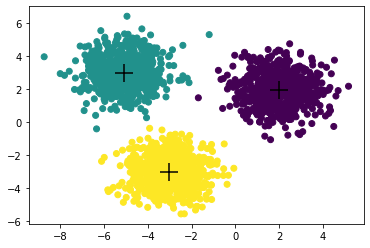

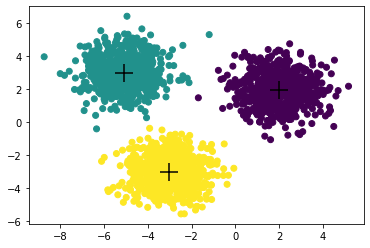

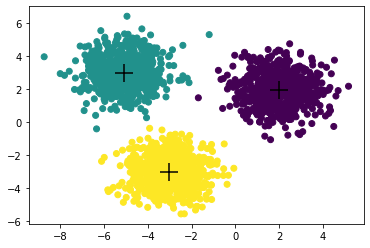

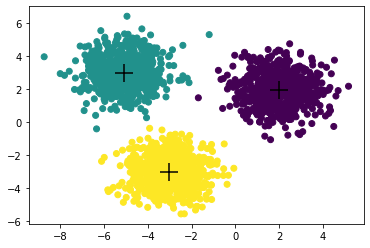

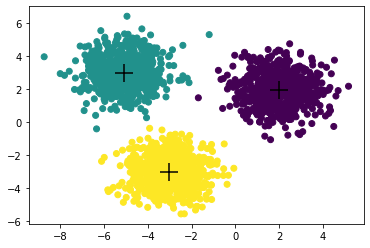

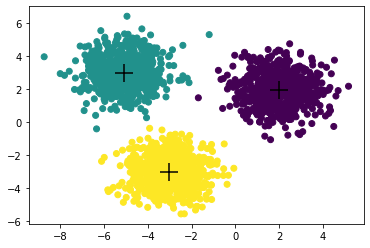

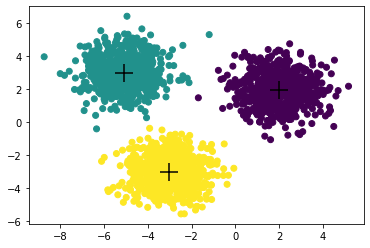

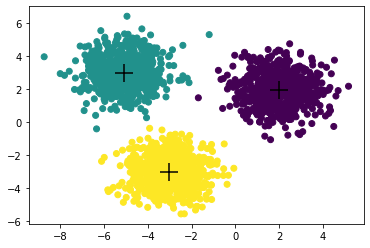

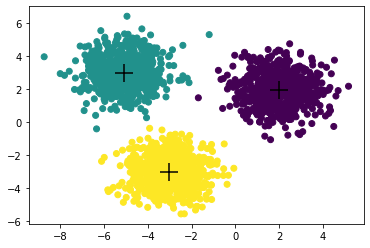

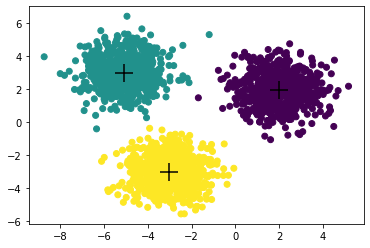

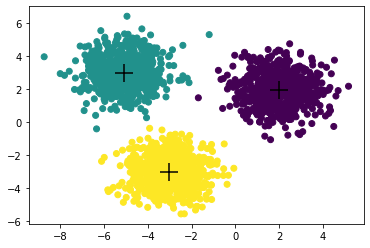

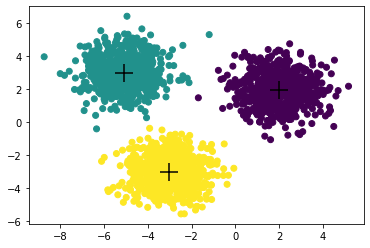

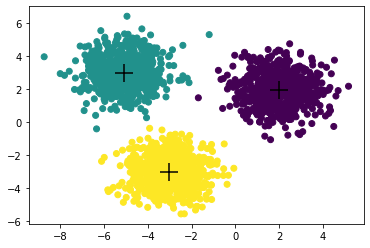

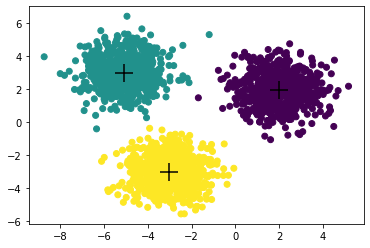

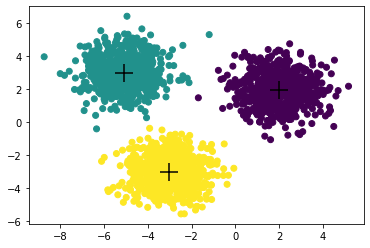

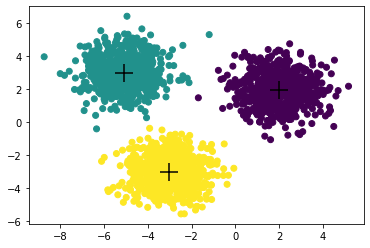

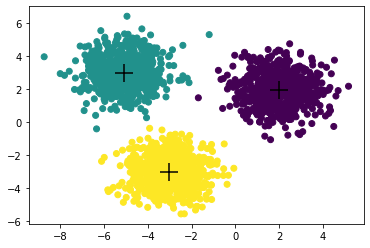

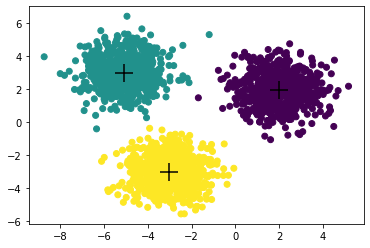

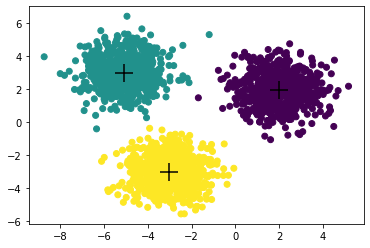

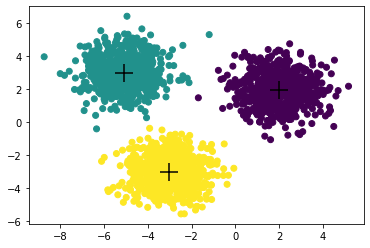

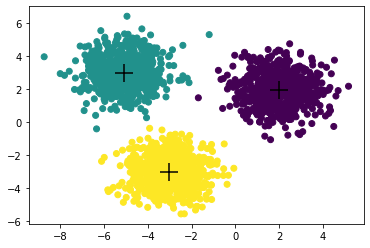

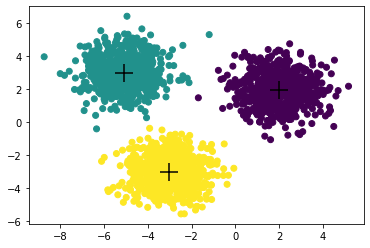

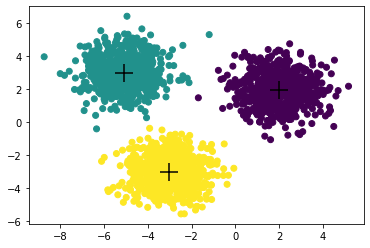

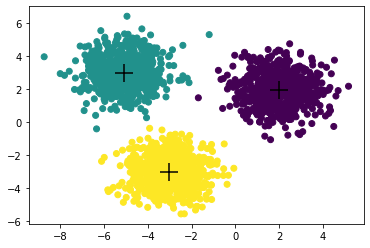

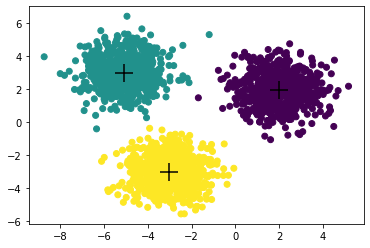

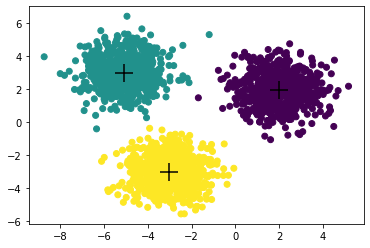

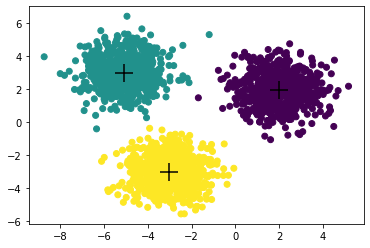

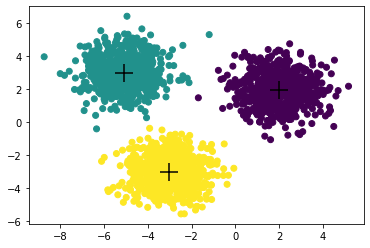

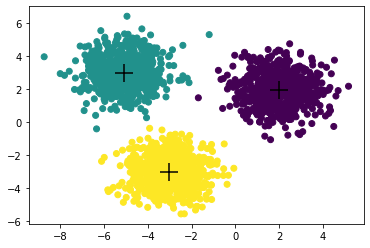

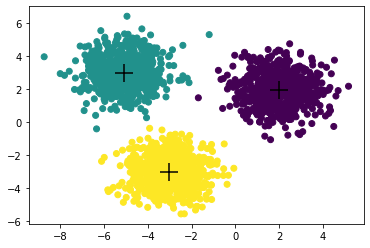

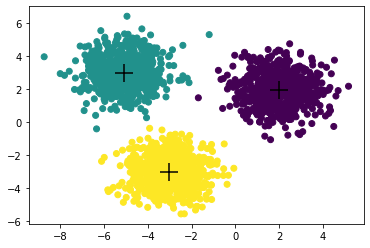

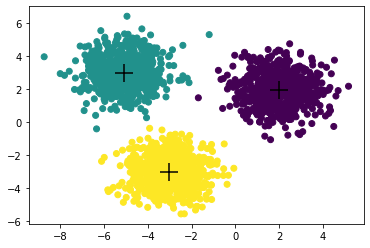

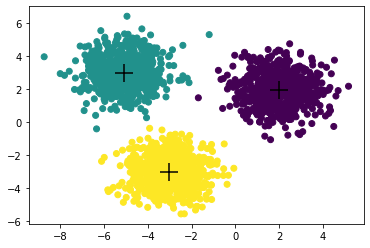

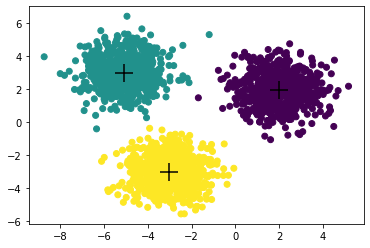

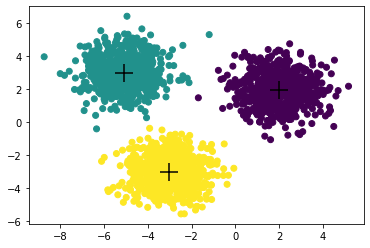

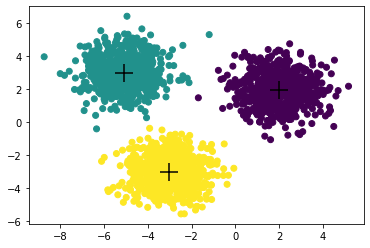

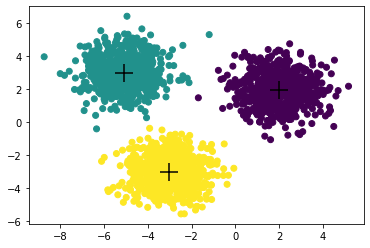

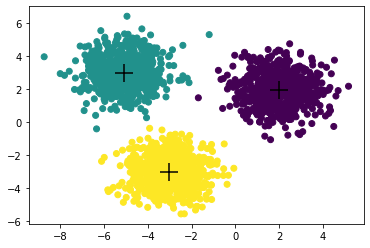

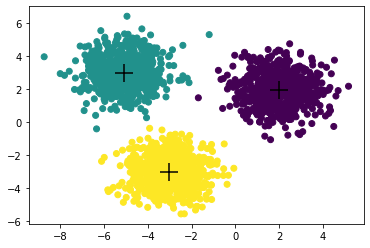

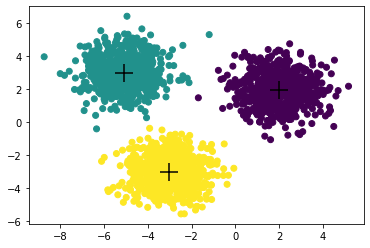

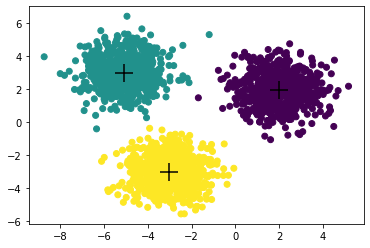

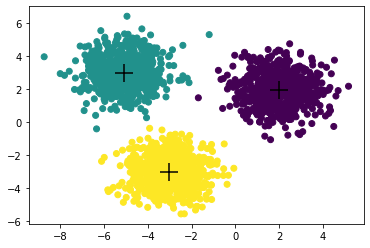

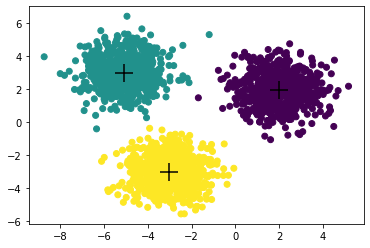

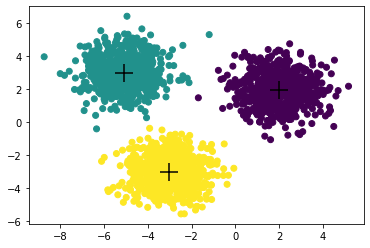

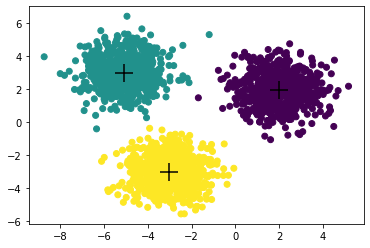

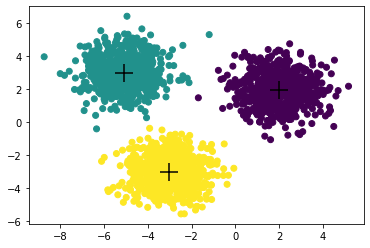

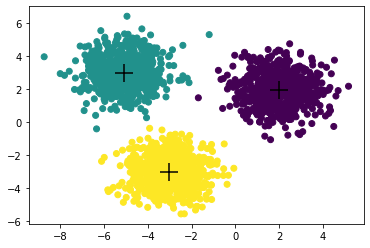

In [55]:
for i in range(100):
    z=assign_clusters(X,k,cluster_centers)
    plt.scatter(X[:,0],X[:,1],c=z)
    plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='k',marker="+",s=300)
    plt.show()
    cluster_centers=compute_cluster_centers(X, z, k)
    

## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.